<a href="https://colab.research.google.com/github/nidam2305/nidam/blob/main/MULTICAPA/COMBUSTIBLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo
## libreria para conjuntos de datos muy grande

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets
## desgarga el conjunto de datos y al mismo tiempo da las  entradas y salidas pero no clasifica


In [4]:
X.head()
## podemos ver si los datos se subieron correctamente las columnas

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [5]:
y.head()
## aqui nos deja ver las filas X.info()


,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [6]:
X.info()
 ## nos muestra a grandes rasgos la tabla por si kos falta algun dato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [7]:
y.info()
## si la variable es completa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [10]:
import pandas as pd

df = pd.concat([X, y], axis=1).dropna()


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    int64  
 4   acceleration  392 non-null    float64
 5   model_year    392 non-null    int64  
 6   origin        392 non-null    int64  
 7   mpg           392 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


In [12]:
X = df.drop('mpg', axis=1)
y = df['mpg']



In [13]:
X = df.drop('mpg', axis=1)
y = df['mpg']
## divide las predicicion X y las  que deben ser predecidas Y

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=1
)
## separa el conjunto de datos entre x y y

In [15]:
print(X_train.shape)
print(X_test.shape)
## si se dividio bien en el test y train

(313, 7)
(79, 7)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
## que todos los datos tengan el mismo peso en el modelo
## osea que las caracteristicas sean iguales en el valor

In [17]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Definir el modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
## cponstruye la red neuronal con las capas ocultas entre las caracteristicas de los autos
## mostrando solo una capa de salida


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
## adam almacena los datos usados

In [19]:
model.compile(
    optimizer=adam_optimizer,
    loss='mean_squared_error',
    metrics=['root_mean_squared_error'],
)
# se define como el modelo va a aprender y evaluarlo osea para reducir el error

In [20]:
history = model.fit(
    X_train, y_train,
    epochs=5, batch_size=1,
    validation_data=(X_test, y_test)
)
## despues de las operaciones en cada epoca nos dira si tiene precision o no


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 400.2078 - root_mean_squared_error: 19.7652 - val_loss: 35.7840 - val_root_mean_squared_error: 5.9820
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16.6148 - root_mean_squared_error: 4.0697 - val_loss: 17.4515 - val_root_mean_squared_error: 4.1775
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.8457 - root_mean_squared_error: 3.4236 - val_loss: 14.1226 - val_root_mean_squared_error: 3.7580
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10.2763 - root_mean_squared_error: 3.1984 - val_loss: 13.9554 - val_root_mean_squared_error: 3.7357
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.6410 - root_mean_squared_error: 3.0960 - val_loss: 12.6640 - val_root_mean_squared_error: 3.5586


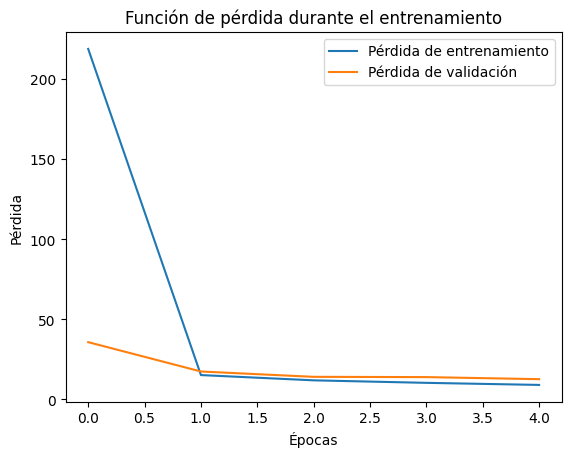

In [21]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()
# graficamente nos muestra cuales si fueron evaluados es decir que la regresion si funciono

In [22]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')
# cuano evalua el modelo nos dice el margen del error


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.4385 - root_mean_squared_error: 3.5264 
Test Mean Absolute Error: 3.56


In [23]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head())
# te genera los resultados de las 5 predicciones es decir las 5 epocas

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
     Actual  Predicted
82     23.0  21.665281
167    29.0  26.141443
356    32.4  32.251095
120    19.0  17.471418
385    38.0  36.639469


In [24]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
print(f'R²: {r2}')

mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')
# la eficiencia del combustible si el modelo se ajusto a los datos o no y si es que tuvo un error promedio

R²: 0.8173174625945693
MSE: 12.663969146210139
